https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/telco_customer_churn.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
colunas = [
    "gender"
    ,"SeniorCitizen"
    ,"Partner"
    ,"Dependents"
    ,"PhoneService"
    ,"MultipleLines"
    ,"InternetService"
    ,"OnlineSecurity"
    ,"OnlineBackup"
    ,"DeviceProtection"
    ,"TechSupport"
    ,"StreamingTV"
    ,"StreamingMovies"
    ,"Contract"
    ,"PaperlessBilling"
    ,"PaymentMethod"
    ,"Service"
]

for coluna in colunas:
    unique_genders = df[coluna].unique()
    print(f'{coluna} : {unique_genders}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Service : ['Just Internet' 'Both' 'Just Phone']


In [5]:
df['Service'] = 9
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] == 'No'), 'Service'] = "Just Phone"
df.loc[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No'), 'Service'] = "Just Internet"
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] != 'No'), 'Service'] = "Both"


C:\Users\FabianoAmaral\AppData\Local\Temp\ipykernel_14556\1713744635.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Just Phone' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] == 'No'), 'Service'] = "Just Phone"


In [36]:
df['OnlineService'] = df.apply(lambda row: 'Yes' if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' else 'No', axis=1)
df['SecurityHelp'] = df.apply(lambda row: 'Yes' if row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' else 'No', axis=1)
df['Streaming'] = df.apply(lambda row: 'Yes' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No', axis=1)

In [21]:
df_filter = df[df['Service'] == "Both"]

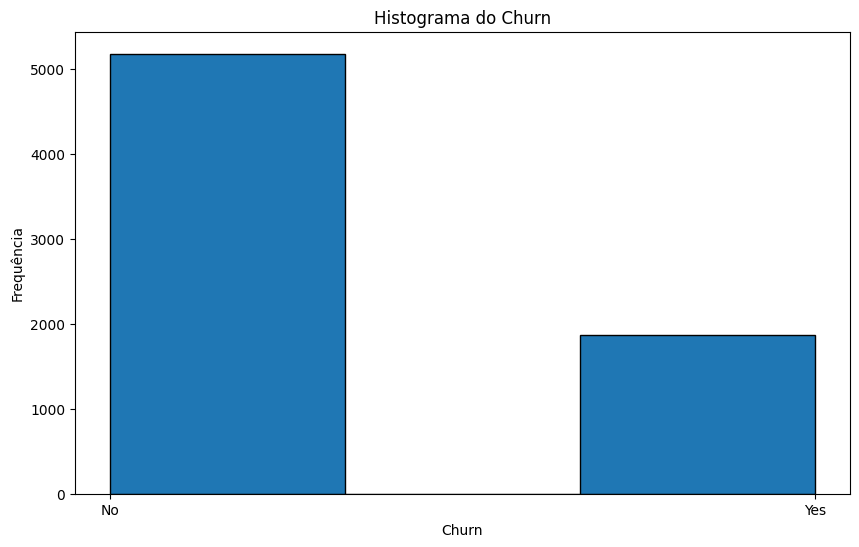

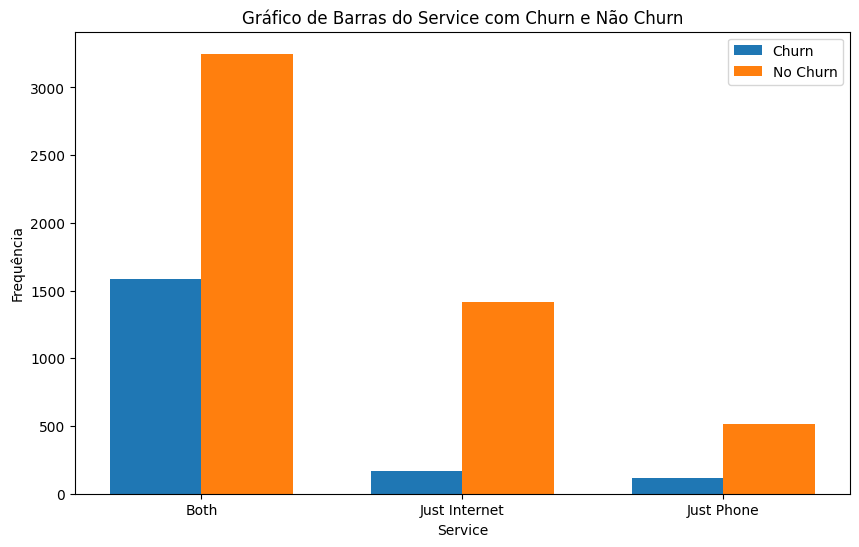

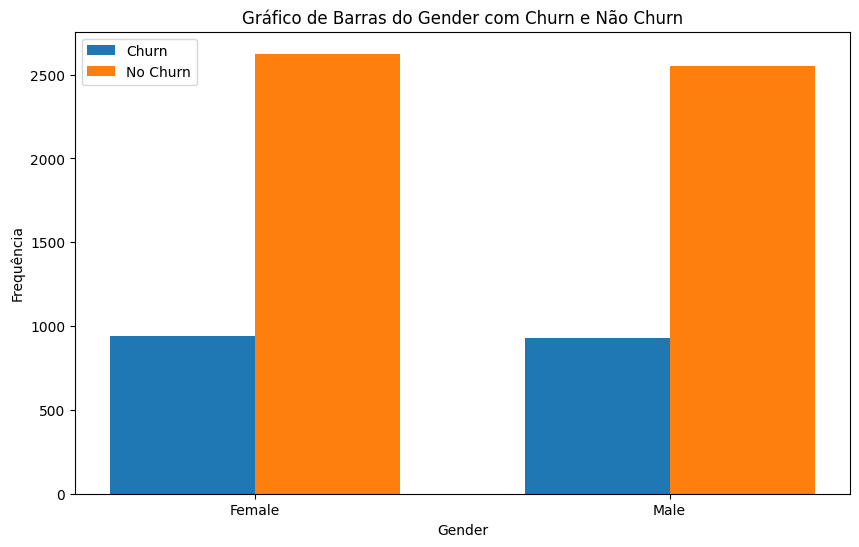

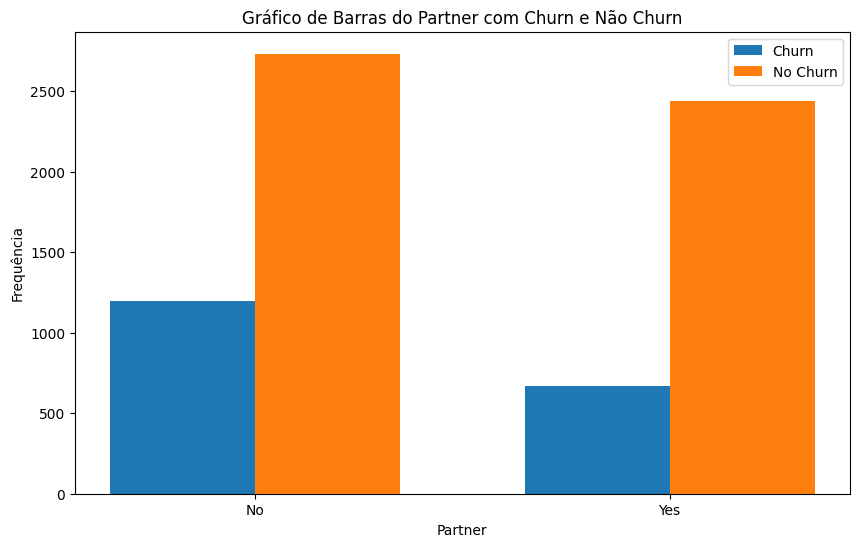

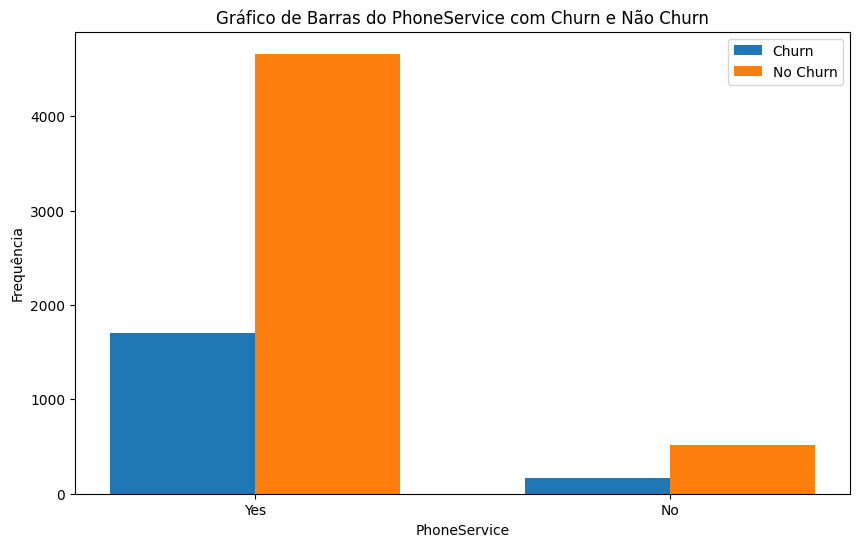

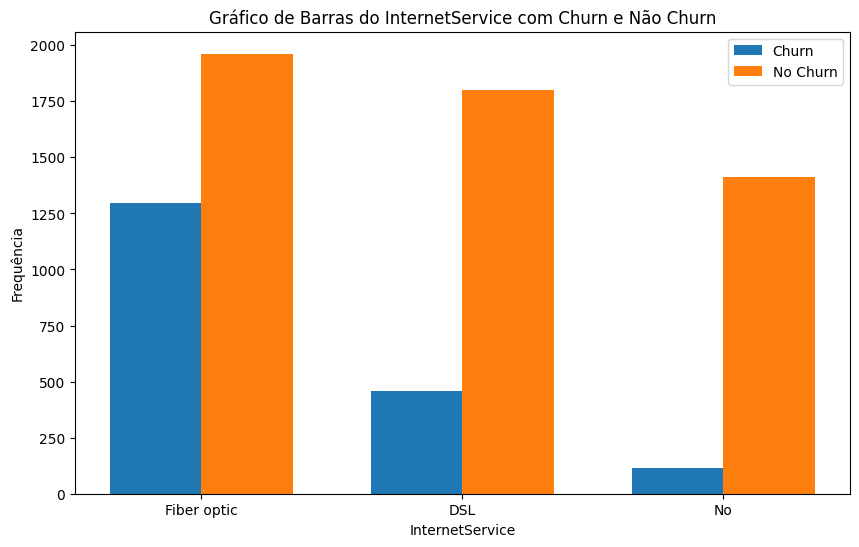

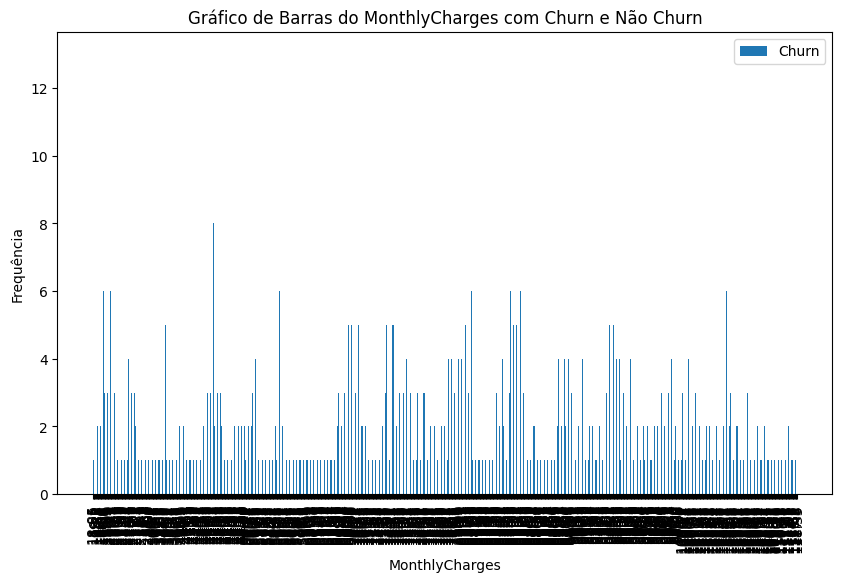

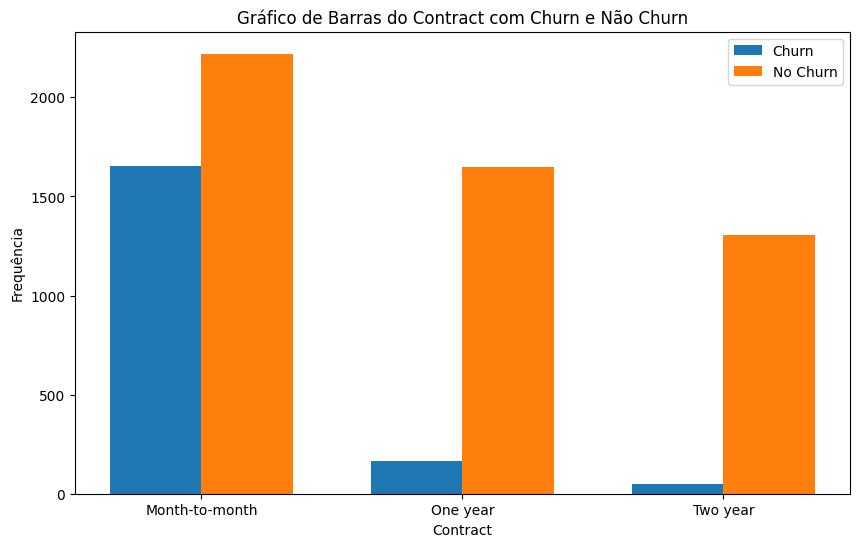

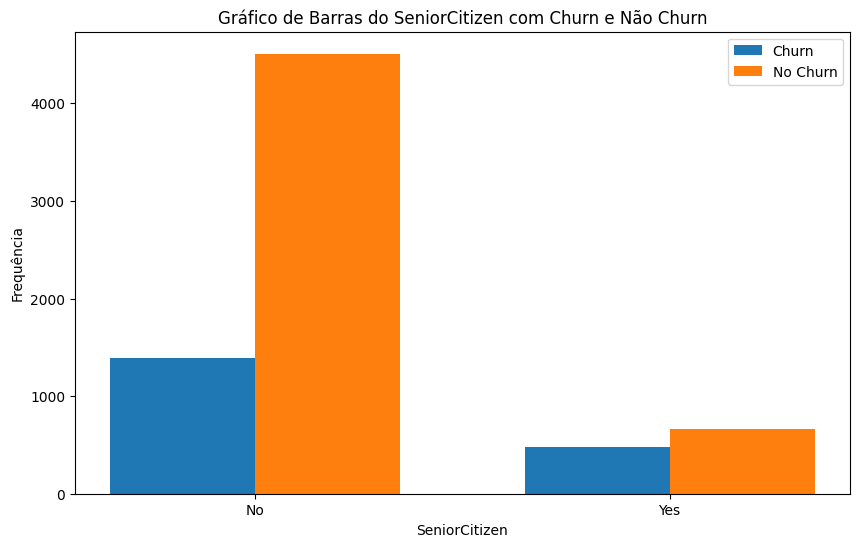

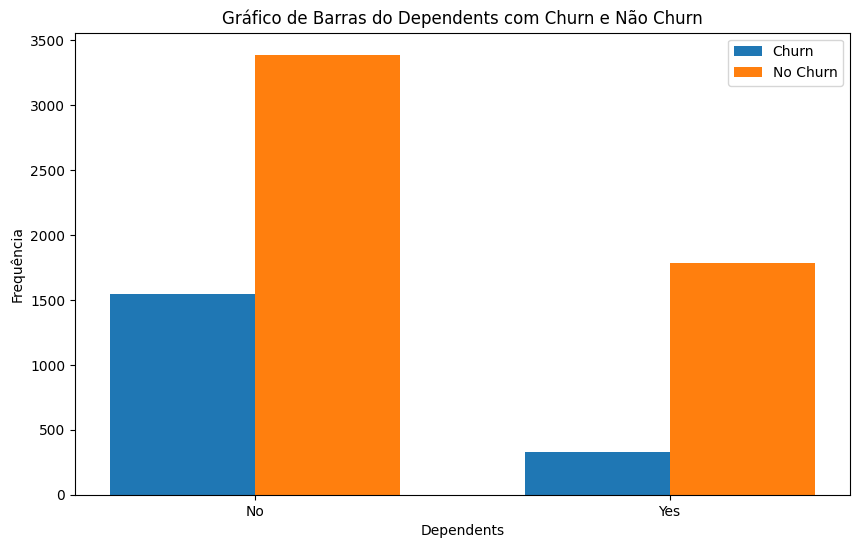

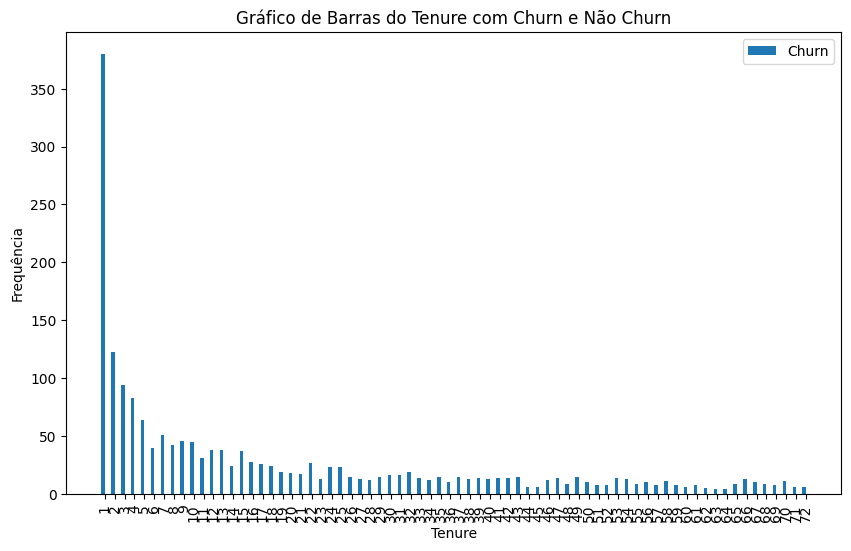

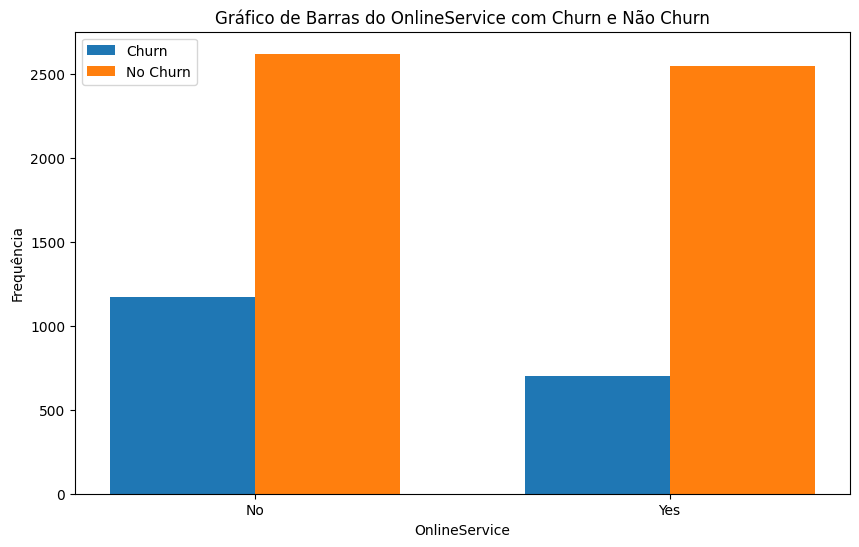

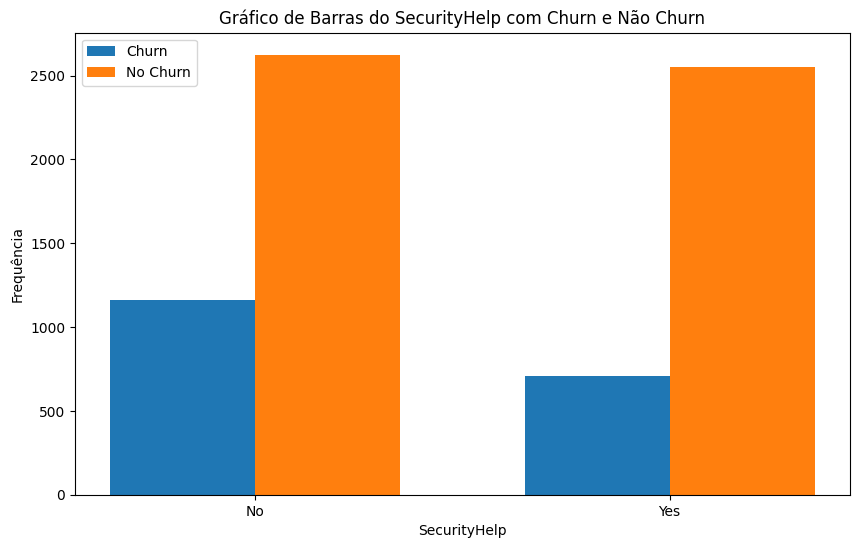

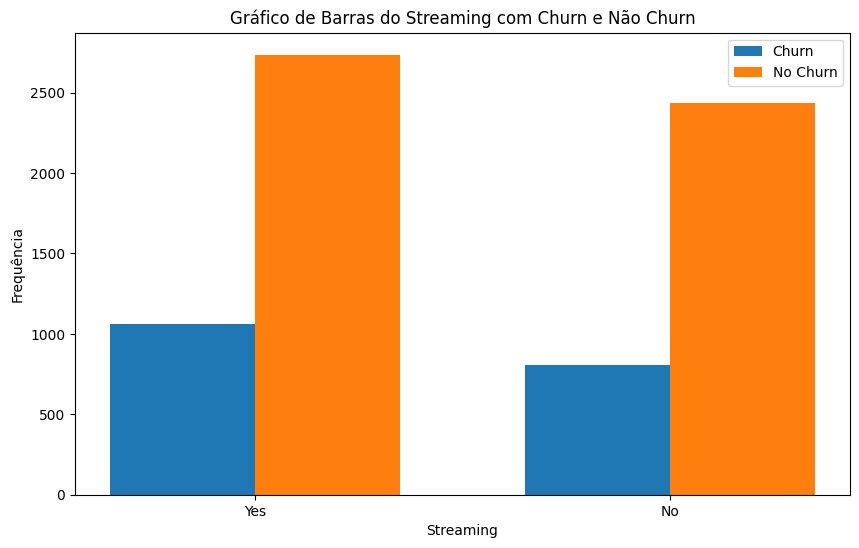

In [37]:
# Histograma do Churn
plt.figure(figsize=(10, 6))
plt.hist(df['Churn'], bins=3, edgecolor='black')
plt.title('Histograma do Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras do Service com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
service_churn_counts = df[df['Churn'] == 'Yes']['Service'].value_counts()
service_no_churn_counts = df[df['Churn'] == 'No']['Service'].value_counts()

bar_width = 0.35
index = range(len(service_churn_counts))

plt.bar(index, service_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], service_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Service')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Service com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], service_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do Gender com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
gender_churn_counts = df[df['Churn'] == 'Yes']['gender'].value_counts()
gender_no_churn_counts = df[df['Churn'] == 'No']['gender'].value_counts()

bar_width = 0.35
index = range(len(gender_churn_counts))

plt.bar(index, gender_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], gender_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Gender')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Gender com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], gender_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do Partner com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
partner_churn_counts = df[df['Churn'] == 'Yes']['Partner'].value_counts()
partner_no_churn_counts = df[df['Churn'] == 'No']['Partner'].value_counts()

bar_width = 0.35
index = range(len(partner_churn_counts))

plt.bar(index, partner_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], partner_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Partner')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Partner com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], partner_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do PhoneService com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
phone_churn_counts = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()
phone_no_churn_counts = df[df['Churn'] == 'No']['PhoneService'].value_counts()

bar_width = 0.35
index = range(len(phone_churn_counts))

plt.bar(index, phone_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], phone_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('PhoneService')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do PhoneService com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], phone_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do InternetService com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
internet_churn_counts = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
internet_no_churn_counts = df[df['Churn'] == 'No']['InternetService'].value_counts()

bar_width = 0.35
index = range(len(internet_churn_counts))

plt.bar(index, internet_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], internet_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('InternetService')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do InternetService com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], internet_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do MonthlyCharges com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
monthly_churn_counts = df[df['Churn'] == 'Yes']['MonthlyCharges'].value_counts().sort_index()
monthly_no_churn_counts = df[df['Churn'] == 'No']['MonthlyCharges'].value_counts().sort_index()

bar_width = 0.35
index = range(len(monthly_churn_counts))

plt.bar(index, monthly_churn_counts, bar_width, label='Churn')
# plt.bar([i + bar_width for i in index], monthly_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('MonthlyCharges')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do MonthlyCharges com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], monthly_churn_counts.index, rotation=90)
plt.legend()
plt.show()

# Gráfico de barras do Contract com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
contract_churn_counts = df[df['Churn'] == 'Yes']['Contract'].value_counts()
contract_no_churn_counts = df[df['Churn'] == 'No']['Contract'].value_counts()

index = range(len(contract_churn_counts))

plt.bar(index, contract_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], contract_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Contract')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Contract com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], contract_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do SeniorCitizen com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
senior_churn_counts = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
senior_no_churn_counts = df[df['Churn'] == 'No']['SeniorCitizen'].value_counts()

index = range(len(senior_churn_counts))

plt.bar(index, senior_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], senior_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('SeniorCitizen')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do SeniorCitizen com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], ['No', 'Yes'])
plt.legend()
plt.show()

# Gráfico de barras do Dependents com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
dependents_churn_counts = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
dependents_no_churn_counts = df[df['Churn'] == 'No']['Dependents'].value_counts()

index = range(len(dependents_churn_counts))

plt.bar(index, dependents_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], dependents_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Dependents')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Dependents com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], dependents_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do tenure com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
tenure_churn_counts = df[df['Churn'] == 'Yes']['tenure'].value_counts().sort_index()
tenure_no_churn_counts = df[df['Churn'] == 'No']['tenure'].value_counts().sort_index()

index = range(len(tenure_churn_counts))

plt.bar(index, tenure_churn_counts, bar_width, label='Churn')
# plt.bar([i + bar_width for i in index], tenure_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Tenure')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Tenure com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], tenure_churn_counts.index, rotation=90)
plt.legend()
plt.show()

# Gráfico de barras do OnlineService com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
online_service_churn_counts = df[df['Churn'] == 'Yes']['OnlineService'].value_counts()
online_service_no_churn_counts = df[df['Churn'] == 'No']['OnlineService'].value_counts()

index = range(len(online_service_churn_counts))

plt.bar(index, online_service_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], online_service_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('OnlineService')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do OnlineService com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], online_service_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do SecurityHelp com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
security_help_churn_counts = df[df['Churn'] == 'Yes']['SecurityHelp'].value_counts()
security_help_no_churn_counts = df[df['Churn'] == 'No']['SecurityHelp'].value_counts()

index = range(len(security_help_churn_counts))

plt.bar(index, security_help_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], security_help_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('SecurityHelp')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do SecurityHelp com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], security_help_churn_counts.index)
plt.legend()
plt.show()

# Gráfico de barras do Streaming com quem deu churn e quem não deu churn
plt.figure(figsize=(10, 6))
streaming_churn_counts = df[df['Churn'] == 'Yes']['Streaming'].value_counts()
streaming_no_churn_counts = df[df['Churn'] == 'No']['Streaming'].value_counts()

index = range(len(streaming_churn_counts))

plt.bar(index, streaming_churn_counts, bar_width, label='Churn')
plt.bar([i + bar_width for i in index], streaming_no_churn_counts, bar_width, label='No Churn')

plt.xlabel('Streaming')
plt.ylabel('Frequência')
plt.title('Gráfico de Barras do Streaming com Churn e Não Churn')
plt.xticks([i + bar_width / 2 for i in index], streaming_churn_counts.index)
plt.legend()
plt.show()

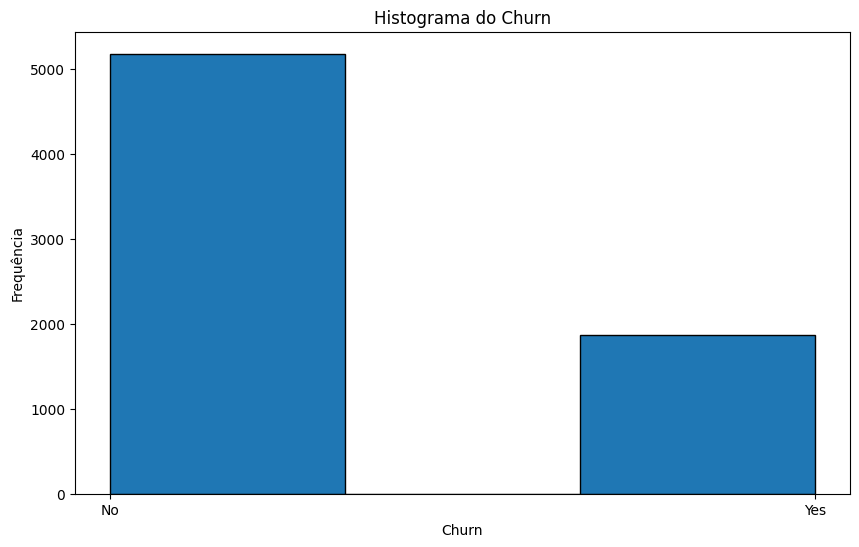

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['Churn'], bins=3, edgecolor='black')
plt.title('Histograma do Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.show()

c:\Users\FabianoAmaral\source\repos\churn_model_ml\ml_churn\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\FabianoAmaral\source\repos\churn_model_ml\ml_churn\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='StreamingTV', ylabel='tenure'>

c:\Users\FabianoAmaral\source\repos\churn_model_ml\ml_churn\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\FabianoAmaral\source\repos\churn_model_ml\ml_churn\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


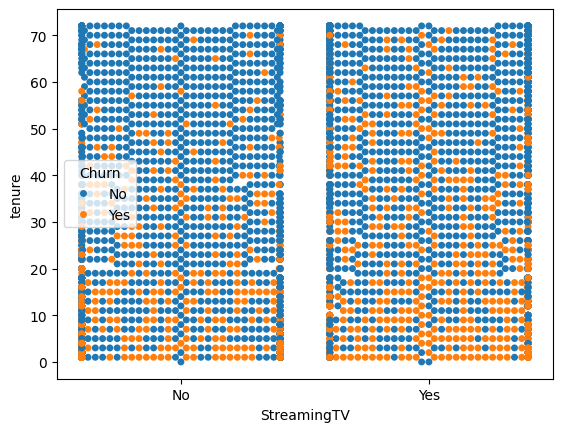

In [22]:
sns.swarmplot(data=df_filter, x="StreamingTV", y="tenure", hue="Churn")

<Axes: xlabel='DeviceProtection', ylabel='Count'>

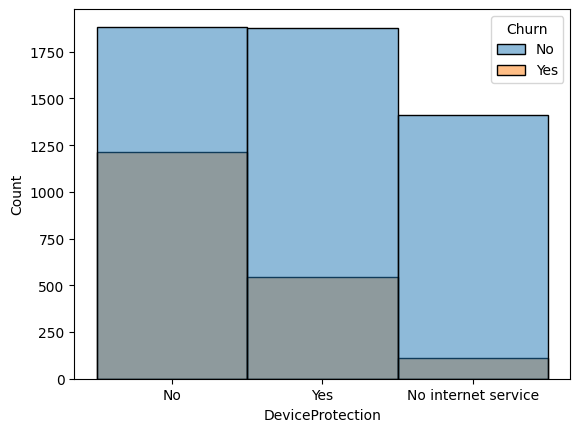

In [13]:
sns.histplot(
    df, x="DeviceProtection", hue="Churn"
)

In [ ]:
# Verificar dados nulos
null_counts = df.isnull().sum()

# Verificar dados em branco
blank_counts = (df == '').sum()

# Combinar os resultados
null_and_blank_counts = pd.DataFrame({'Nulls': null_counts, 'Blanks': blank_counts})
print(null_and_blank_counts)

In [ ]:
sns.histplot(
    df, x="gender", hue="Churn"
).set_title('Churn por Gênero')

In [ ]:
sns.histplot(
    df, x="Partner", hue="Churn"
)

In [ ]:
sns.histplot(
    df, x="Dependents", hue="Churn"
)

In [ ]:
# Filtrar os dados
dependents_no = df[df['Dependents'] == 'No']
dependents_no_churn_yes = dependents_no[dependents_no['Churn'] == 'Yes']

# Calcular as somas
soma_dependents_no_churn_yes = len(dependents_no_churn_yes)
soma_dependents_no = len(dependents_no)

# Calcular a proporção
proporcao = soma_dependents_no_churn_yes / soma_dependents_no
print(proporcao)

In [ ]:
# Filtrar os dados
dependents_no = df[df['Dependents'] == 'Yes']
dependents_no_churn_yes = dependents_no[dependents_no['Churn'] == 'Yes']

# Calcular as somas
soma_dependents_no_churn_yes = len(dependents_no_churn_yes)
soma_dependents_no = len(dependents_no)

# Calcular a proporção
proporcao = soma_dependents_no_churn_yes / soma_dependents_no
print(proporcao)

In [ ]:
sns.histplot(
    df, x="tenure", hue="Churn"
)

In [ ]:
sns.histplot(
    df, x="MonthlyCharges", hue="Churn"
)

In [ ]:
sns.histplot(
    df, x="PaymentMethod", hue="Churn"
)

In [ ]:
sns.histplot(
    df, x="PaperlessBilling", hue="Churn"
)     